# Advanced Project: Long Run
## Making Time Series Graphs


In [3]:
#Packages used in this guide.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1) Importing CSV files and creating a single and multiple variable time-series graphs.

In the following exercises we will use the [snapshots.pdf](http://web.stanford.edu/~chadj/snapshots.pdf) file, together with its hyperlinks to the underlying data. We have already imported, processed the data, and wrote most of the code. You will be required to make small changes to the code to complete the assignment. Please follow the comments below.

__(a)__ Make a plot of per capita GDP (in dollars) for the years 1950 to 2014 for a country of your choice. Label the x-axis "year" and the y-axis "per capita GDP." [Click here for a list of the country codes](http://web.stanford.edu/~chadj/countrycodes6.3). Write a small description of the plot you create.



In [2]:
# Run the code below, only changing what is asked in the comments.

# Determine what country's per capita GDP you'd like to graph. The following list provides the country
# names of all the countries available in our dataset along with their abreviated 'country codes.'

# Write the 'country code' of your choosing as the variable "country_code" (ex: USA) in the input box below after you run this cell (clicking Shift+Enter).
#(ex: USA)

country_code = input("ISL")

# The following code line of code will read and import the data we processed. 
# *DO NOT CHANGE THIS CODE*

percap_gdp = (pd.read_csv('https://raw.githubusercontent.com/dylanjm/econ_381_development/master/data/ch01_gdp.csv').query('country in @country_code'))

a = np.array(percap_gdp['y_pop']) 

Y1 = a[0]
Y2 =  a[-1]
T = len(a)

AvgGR = ((Y2 / Y1) ** (1/T))-1
AvgGR = round(AvgGR, 5)*100
print("Iceland has an average GDP growth rate of " + str(AvgGR) + "%")


# When you are ready to run this code place your cursor in this cell and hit Shift+Enter

Iceland has an average GDP growth rate of 2.432%


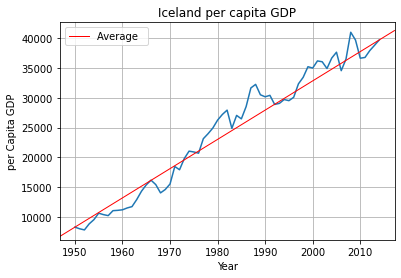

In [3]:
# Now let's create the plot
# The code below creates a plot using the 'x' variable 'year' and 'y' variable 'y_pop'
x = np.linspace(0,50000)
plt.plot(percap_gdp['year'], percap_gdp['y_pop'])
plt.axline((1950, 8322), (2014, 39678), linewidth=1, color='r', label="Average  ")
# Change the title of your graphic to fit with whatever country you chose previously!

plt.title('Iceland per capita GDP')
plt.xlabel('Year')
plt.ylabel('per Capita GDP')
plt.grid()
plt.legend(loc='upper left')
plt.show()


Iceland has an average GDP growth rate of 2.432%. We can see some output reflections that resemble those of larger countries, such as the usa in 2009. This shows us that the recession was somewhat transmitted into Iceland.


__(b)__ Make a plot of per capita GDP relative to the United States (US = 100) from 1950 to 2014. The graph should include the United States and three other countries of your choice, all on the same chart. Label the lines in an informative way so that each line can be associated with its country. Finally, write a short description of the plot you create.

In [4]:
# Insert your 3 countries you'd like to compare to the USA in an array
# Please ensure you keep 'USA' included.

three_countries = ['ISL','CAN','JPN','USA']

# Appends each country's data arrays together into a dataset.
# *DO NOT CHANGE THIS CODE*
percap_gdp = (pd.read_csv('https://raw.githubusercontent.com/dylanjm/econ_381_development/master/data/ch01_gdp.csv').query("country in @three_countries"))
#ensure only years in range are used
percap_gdp = percap_gdp.query('year > 1950')
percap_gdp = percap_gdp.query('year <2014')

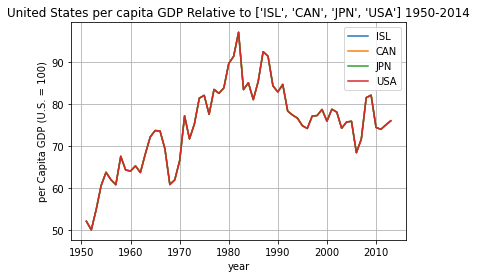

In [6]:
# The following code creates a figure that contains more than one data series. Compare it to the
# code we wrote for the previous question.

for i in three_countries:
    plot_dat = percap_gdp.query("country == @i")
    plt.plot(plot_dat["year"], plot_dat["y_pop_us_100"], label = i)

# Now let's customize the plot. The following code sets labels on the x and y axis and sets the
# title for the figure. Note that it uses a previously defined variable in the title that changes
# every time you change your choice of countries (see code cell above)

plt.xlabel("year")
plt.ylabel("per Capita GDP (U.S. = 100)")
plt.title("United States per capita GDP Relative to " + str(three_countries) + " 1950-2014")
plt.grid()
plt.legend()
plt.show()

Relative to the US GDP per Capita we see that Canada follows a relatively constant pattern along with the US, Iceland and Japan differ substansially though. Japan grew quickly since the fifties, recovering from WW2 and Iceland experienced a boom in the 80's becoming nearly equivilant to the US before falling back down towards a lower sustained average.

## 2) Datetime package

A date in Python is not a data type on its own, but the module datetime allows us to work with dates as objects. We can use objects to create relationships and illustrations. Importantly for economics, time-series graphs use the datetime module in Python to correctly show dates. A further guide of the module is  [Here](https://www.w3schools.com/python/python_datetime.asp)

Using the data found [Here](https://github.com/dylanjm/econ_381_development/tree/master/data) import the data for `ch08_italy_inflation.csv` and `ch08_italy_bond.csv`. Ensure to use the __raw url__ for your Python code.

__(a)__: Using Python, create a __single__ plot showing both the 10 year bond yields and inflation rate for Italy. Use the dates provided by the data. 

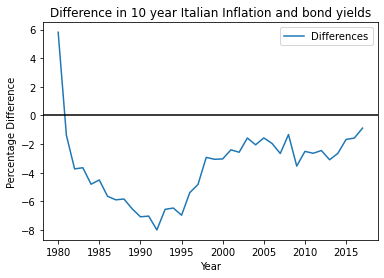

In [6]:
# Import data 
inflation_url = "https://raw.githubusercontent.com/dylanjm/econ_381_development/master/data/ch08_italy_inflation.csv"
inflation = pd.read_csv(inflation_url,header=0, names=['Date', 'Inflation'])

bond_url = "https://raw.githubusercontent.com/dylanjm/econ_381_development/master/data/ch08_italy_bond.csv"
bond = pd.read_csv(bond_url,header=0, names=['Date', 'Bond_Yield'])

# Merge dataframes
italy_rates = pd.merge(inflation, bond, on='Date', how='outer')

# Plot
italy_rates['Date'] = pd.to_datetime(italy_rates['Date'])                   
italy_rates['Year'] = italy_rates['Date'].dt.year  
italy_rates['Differences'] = italy_rates['Inflation'] - italy_rates['Bond_Yield']                       
italy_rates.plot(x = 'Year', y = ['Differences'], kind = 'line')
plt.axhline(y=0, color='black')
plt.title("Difference in 10 year Italian Inflation and bond yields")
plt.ylabel("Percentage Difference")
#added title
plt.show()

## 3) Practice Charting in Python

**a)** The comments below will walk you through importing data on Amazon's (AMZN) stock price over time. Create a time series plot of the stock price with time on the x-axis and price on the y-axis. Don't forget to make the graph look professional by including proper labels, titles, and colors.


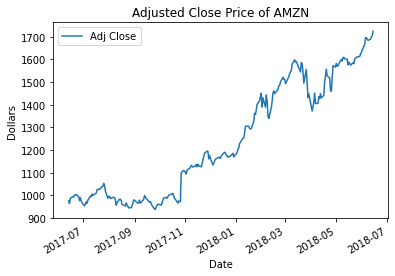

In [7]:
# Step 1: Import the data from Git Hub. Open the URL below to view the data that you are working with 
#Decide which column you will want to use as your price variable

amzn = pd.read_csv('https://raw.githubusercontent.com/dylanjm/econ_381_development/master/data/AMZN.csv')

# Step 2: Convert the date variable to a date time object
#Note that the tite of the data that you are pulling is case sensitive. This code will not work if 'Date' is spelled 'date'

amzn['Date'] = pd.to_datetime(amzn['Date'])                   

# Step 3: Make the time series plot using Python's Matplotlib. Use the new date variable and the column you want to use as the price variable. 
#View Chapter 1 Q2a to see how to pull data from a csv into a plot.
amzn.plot(x = 'Date', y = ['Adj Close'], kind = 'line')
plt.title("Adjusted Close Price of AMZN")
#added title
plt.ylabel("Dollars")
plt.show()

